In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('raw data.csv') #importing data to data frame

In [ ]:
data.head() #viewing first 5 records

,Area / State,Utilisation,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15*
0,Assam,Gross Production,2573.00,2703.01,2679.85,2904.54,2909.79,2868.03,2958.25
1,Assam,Flared,173.38,182.24,174.76,168.65,193.89,172.63,186.02
2,Assam,Net Availability ^,2399.62,2520.77,2505.09,2735.89,2715.90,2695.40,2772.23
3,Assam,Re-injected (Internal Use),540.11,558.57,549.73,583.85,576.76,567.55,578.17
4,Assam,Net Production (Sales),1859.74,1963.38,1958.79,2151.86,2139.12,2127.86,2194.06


In [ ]:
data['Area / State'].unique()

array(['Assam ', 'Arunachal Pradesh', 'Rajasthan', 'Gujarat',
       'Tamil Nadu ', 'Andhra Pradesh', 'Tripura', 'West Bengal (CBM) ',
       'Madhya Pradesh (CBM)', 'Jharkhand (CBM)', 'A. Total Onshore',
       'B. Offshore', 'Total (A&B)'], dtype=object)

Records with 'Area / State' column marked as 'A. Total Onshore', 'B. Offshore', 'Total (A&B)' represent aggregate values and thus need to be deleted

In [ ]:
useless_categories = ['A. Total Onshore', 'B. Offshore','Total (A&B)']
data = data[~data['Area / State'].isin(useless_categories)]

# Data cleaning

In [ ]:
round(data.isna().mean()*100,0)      #viewing % of null values in the columns

Area / State     0.0
Utilisation      0.0
2008-09         20.0
2009-10         20.0
2010-11         20.0
2011-12          0.0
2012-13          0.0
2013-14          0.0
2014-15*         0.0
dtype: float64

There are 15% of records in columns '2008-09' , '2009-10' and '2010-11' are null

In [ ]:
data[data['2008-09'].isna()] #viewing null records

,Area / State,Utilisation,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15*
48,Madhya Pradesh (CBM),Gross Production,NaN,NaN,NaN,1.53,3.44,5.65,2.08
49,Madhya Pradesh (CBM),Flared,NaN,NaN,NaN,0.89,2.30,4.09,1.29
50,Madhya Pradesh (CBM),Net Availability ^,NaN,NaN,NaN,0.63,1.14,1.57,0.79
51,Madhya Pradesh (CBM),Re-injected (Internal Use),NaN,NaN,NaN,0.63,1.14,1.57,0.79
52,Madhya Pradesh (CBM),Net Production (Sales),NaN,NaN,NaN,0.00,0.00,0.00,0.00
53,Madhya Pradesh (CBM),% Flared to GP,NaN,NaN,NaN,58.58,66.89,72.29,62.16
54,Jharkhand (CBM),Gross Production,NaN,NaN,NaN,3.56,2.95,3.38,2.48
55,Jharkhand (CBM),Flared,NaN,NaN,NaN,0.00,0.00,0.00,0.00
56,Jharkhand (CBM),Net Availability ^,NaN,NaN,NaN,3.56,2.95,3.38,2.48
57,Jharkhand (CBM),Re-injected (Internal Use),NaN,NaN,NaN,0.00,0.00,0.00,0.02


Since production started from Madhya Pradesh and Jharkhand CBM fields in 2011, there are no records prior to that

In [ ]:
cleaned_data = data.fillna(0)

In [ ]:
round(cleaned_data.isna().mean()*100,0)

Area / State    0.0
Utilisation     0.0
2008-09         0.0
2009-10         0.0
2010-11         0.0
2011-12         0.0
2012-13         0.0
2013-14         0.0
2014-15*        0.0
dtype: float64

# Gross production

In [ ]:
gross_production = cleaned_data[cleaned_data['Utilisation'].isin(['Gross Production'])] #extraction year wise gross production data
gross_production.drop(columns='Utilisation',inplace = True) #removing redundant column

C:\Users\hp\AppData\Local\Temp\ipykernel_8860\1716123215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_production.drop(columns='Utilisation',inplace = True) #removing redundant column


In [ ]:
gross_production

,Area / State,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15*
0,Assam,2573.0,2703.01,2679.85,2904.54,2909.79,2868.03,2958.25
6,Arunachal Pradesh,30.0,39.60,44.49,39.50,41.07,41.39,33.53
12,Rajasthan,216.0,238.86,432.49,590.18,685.42,982.20,1177.77
18,Gujarat,2605.0,2444.18,2261.83,2172.93,2032.09,1656.94,1525.65
24,Tamil Nadu,1242.0,1177.75,1119.18,1284.76,1206.04,1304.02,1191.57
30,Andhra Pradesh,1524.0,1479.26,1384.39,1363.78,1248.55,1171.34,540.59
36,Tripura,553.0,563.79,609.98,643.90,646.74,822.24,1140.04
42,West Bengal (CBM),20.0,38.40,41.36,79.11,100.85,156.49,223.68
48,Madhya Pradesh (CBM),0.0,0.00,0.00,1.53,3.44,5.65,2.08
54,Jharkhand (CBM),0.0,0.00,0.00,3.56,2.95,3.38,2.48


In [ ]:
#finding highest gross producer of natural gas in different years

List = ['2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15*']
states = []
for i in List:
    states.append(gross_production[gross_production[i]==gross_production[i].max()]['Area / State'].values[0])

production = gross_production[List].max()

top_gross_producer = pd.DataFrame({'State':states, 'Gross production':production})
top_gross_producer = top_gross_producer.reset_index().rename(columns={'index':'Year'})

In [ ]:
top_gross_producer

,Year,State,Gross production
0,2008-09,Gujarat,2605.00
1,2009-10,Assam,2703.01
2,2010-11,Assam,2679.85
3,2011-12,Assam,2904.54
4,2012-13,Assam,2909.79
5,2013-14,Assam,2868.03
6,2014-15*,Assam,2958.25


Assam has been the leading highest gross producer of natural gas since 2009

In [ ]:
gross_production[['Area / State','2008-09']].sort_values(by='2008-09',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2008-09
0,Gujarat,2605.0
1,Assam,2573.0
2,Andhra Pradesh,1524.0
3,Tamil Nadu,1242.0
4,Tripura,553.0
5,Rajasthan,216.0
6,Arunachal Pradesh,30.0
7,West Bengal (CBM),20.0
8,Madhya Pradesh (CBM),0.0
9,Jharkhand (CBM),0.0


In [ ]:
gross_production[['Area / State','2009-10']].sort_values(by='2009-10',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2009-10
0,Assam,2703.01
1,Gujarat,2444.18
2,Andhra Pradesh,1479.26
3,Tamil Nadu,1177.75
4,Tripura,563.79
5,Rajasthan,238.86
6,Arunachal Pradesh,39.60
7,West Bengal (CBM),38.40
8,Madhya Pradesh (CBM),0.00
9,Jharkhand (CBM),0.00


In [ ]:
gross_production[['Area / State','2010-11']].sort_values(by='2010-11',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2010-11
0,Assam,2679.85
1,Gujarat,2261.83
2,Andhra Pradesh,1384.39
3,Tamil Nadu,1119.18
4,Tripura,609.98
5,Rajasthan,432.49
6,Arunachal Pradesh,44.49
7,West Bengal (CBM),41.36
8,Madhya Pradesh (CBM),0.00
9,Jharkhand (CBM),0.00


In [ ]:
gross_production[['Area / State','2011-12']].sort_values(by='2011-12',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2011-12
0,Assam,2904.54
1,Gujarat,2172.93
2,Andhra Pradesh,1363.78
3,Tamil Nadu,1284.76
4,Tripura,643.90
5,Rajasthan,590.18
6,West Bengal (CBM),79.11
7,Arunachal Pradesh,39.50
8,Jharkhand (CBM),3.56
9,Madhya Pradesh (CBM),1.53


In [ ]:
gross_production[['Area / State','2012-13']].sort_values(by='2012-13',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2012-13
0,Assam,2909.79
1,Gujarat,2032.09
2,Andhra Pradesh,1248.55
3,Tamil Nadu,1206.04
4,Rajasthan,685.42
5,Tripura,646.74
6,West Bengal (CBM),100.85
7,Arunachal Pradesh,41.07
8,Madhya Pradesh (CBM),3.44
9,Jharkhand (CBM),2.95


In [ ]:
gross_production[['Area / State','2013-14']].sort_values(by='2013-14',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2013-14
0,Assam,2868.03
1,Gujarat,1656.94
2,Tamil Nadu,1304.02
3,Andhra Pradesh,1171.34
4,Rajasthan,982.20
5,Tripura,822.24
6,West Bengal (CBM),156.49
7,Arunachal Pradesh,41.39
8,Madhya Pradesh (CBM),5.65
9,Jharkhand (CBM),3.38


In [ ]:
gross_production[['Area / State','2014-15*']].sort_values(by='2014-15*',ascending=False).reset_index().drop(columns='index',axis=0)

,Area / State,2014-15*
0,Assam,2958.25
1,Gujarat,1525.65
2,Tamil Nadu,1191.57
3,Rajasthan,1177.77
4,Tripura,1140.04
5,Andhra Pradesh,540.59
6,West Bengal (CBM),223.68
7,Arunachal Pradesh,33.53
8,Jharkhand (CBM),2.48
9,Madhya Pradesh (CBM),2.08


Assam, Gujarat have been top 2 gross producers consistently from 2008 to 2015 while Jharkhand and Madhya Pradesh have been bottom 2 gross producers consistently during the same period

<Axes: >

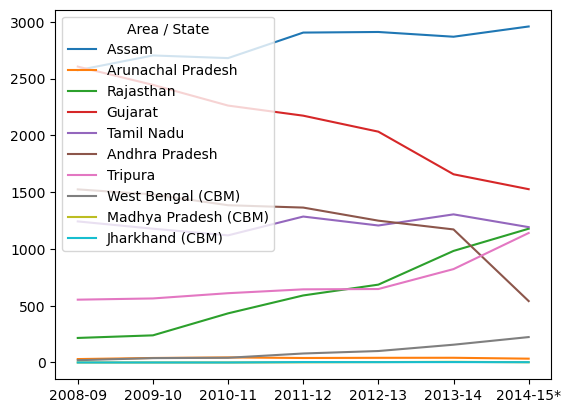

In [ ]:
gross_production.set_index('Area / State').transpose().plot()

* Gross production of Assam,Rajasthan, Tripura and Tami Nadu have increased from 2008 to 2015
* Gross production of Gujarat and Andhra Pradesh have dropped consistently from 2008 to 2015
* Gross production of CBM reserves have stayed almost constant from 2008 to 2015

# Net production

<Axes: >

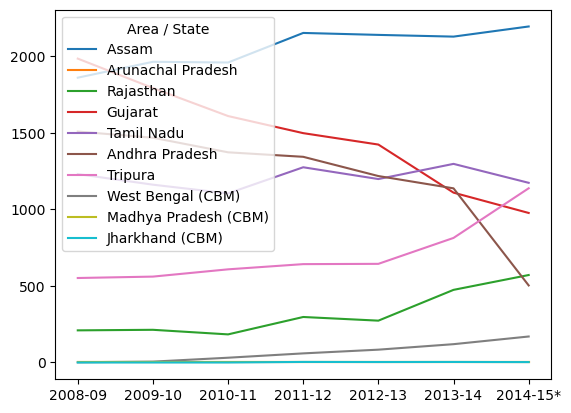

In [ ]:
cleaned_data[cleaned_data['Utilisation']=='Net Production (Sales)'].set_index('Area / State').drop(columns='Utilisation').transpose().plot()

Except for initial phase of 2008-09, Assam has been the leading state in terms of net production of natural gas

# Percentage of gas flared

<Axes: >

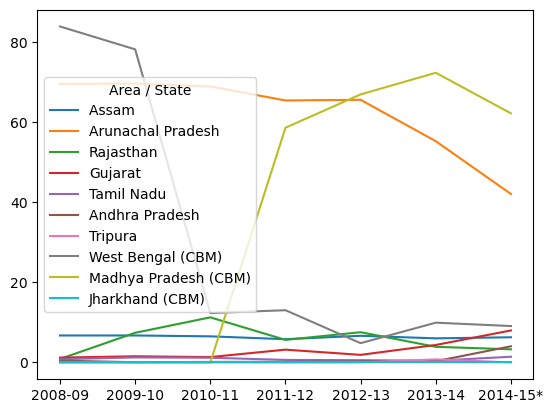

In [ ]:
cleaned_data[cleaned_data['Utilisation']== '% Flared to GP'].set_index('Area / State').drop(columns='Utilisation').transpose().plot()

There has been general decreasing trend in percentage of gas flared. Most of the gas flared has been in CBM reserves at Madhya Pradesh

# Volume of gas re-injected

<Axes: >

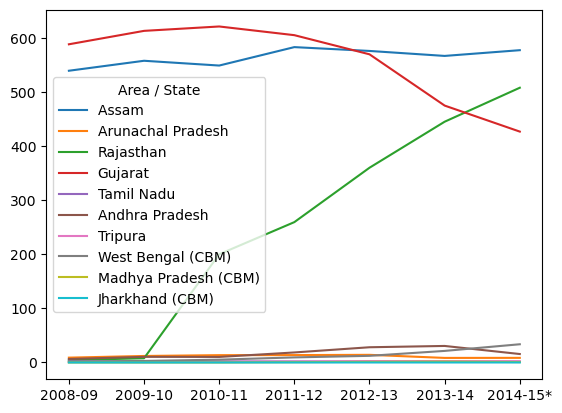

In [ ]:
cleaned_data[cleaned_data['Utilisation']== 'Re-injected (Internal Use)'].set_index('Area / State').drop(columns='Utilisation').transpose().plot()

Historically, Assam and Gujarat have been at forefront in terms of volume of gas re-injected into the reservoir. Rajasthan has steadily ramped up its re-injected gas volume since 2009.

* Assam has been leading the sales of natural gas since mid 2008-09 notwithstanding increased gross production of natural gas in few other states. It has managed to achieve this minimizing flaring of produced gas.
* In-terms of gas re-injection, Rajasthan has steadily ramped up since 2009 after discovery of Saraswati and Guda fields in 2008.
* Performance of CBM fields in West Bengal, Madhya Pradesh and Jharkhand have been relatively unimpressive as they have a long way to go before they catch up with the major producer states in terms of gas sales as they are flaring most of their gas produced.